# Students Performance Prediction



Author:Hanan

Date:01/07/2024


## Table of Contents

- Overview of problem statement 
- Objective
- Data collection
- Data Description
- Exploratory Data Analysis(EDA)
- Data Preprocessing
- Outlier Detection
- Visualize Data
- Feature Scaling
- Model Building
- Evaluating the Model
- Tuning the Model
- Reducing Dimensinality
- Conclusion
- Future Work


## Overview of problem statement 

##### Here we are trying to predict "Academic Success Rate of High School Students".

## Objective

The main objective of this project is to:
- Determine which features are most important for predicting academic success of students ( Grade Class)
- Perform dimensionality reduction if certain features are not correlated to Grade Class
- Encode categorical variables and scale numerical variables
- Split the dataset into predictors (X) and target (y)
- Split the X and y datasets into training and testing sets
- Determine the best model for the dataset, fit it to the training set, and use this model to make predictions on the test set.
- Tune the hyperparameters of the model to (hopefully) increase accuracy and address any over/underfitting

  These steps will create a machine learning model capable of using the features in this dataset to predict the grade that a hypothetical student might receive.
                                             

In [130]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [132]:
! python -m pip install xgboost

In [133]:
pip install lightgbm 

In [134]:
pip install catboost

In [135]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv


## Data collection

Data can be imported into a data analysis environment from various sources using different tools and libraries. import data using popular tools and libraries in Python, which is a common language for data analysis:
1.Importing the Pandas Library
 - Pandas: This line imports the pandas library, which is a powerful open-source data manipulation and analysis library for Python. Pandas provides data structures and functions needed to manipulate structured data seamlessly.
2.Reading the CSV File
 - pd.read_csv: This function reads a CSV (Comma-Separated Values) file into a DataFrame. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).
 - Downloads/Student_performance_data _.csv': This is the file path to the CSV file that we want to read. Ensure the file path is correct and points to the location of our CSV file.
 - df: This is the variable that stores the DataFrame created by reading the CSV file. The DataFrame 'df' will contain the data from the CSV file with rows and columns corresponding to the data in the file.

In [136]:
df=pd.read_csv('Downloads/Student_performance_data _.csv')
df

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0            7         1                2                0       0      1   
1            0         0                1                0       0      0   
2           26         0                2                0       0      0   
3           14         0                3                1       0      0   
4           17         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  2.929196         2.0  
1                0  3.042915         1.0  
2                0  0.112602         4.0  
3                0  2.054218         3.0  
4                0  1.288061         4.0  
...            ...       ...         ...  
2387             0  3.455509         0.0  
2388             0  3.279150         4.0  
2389             1  1.142333         2.0  
2390             0  1.803297         1.0  
2391             1  2.140014         1.0  

[2392 rows x 15 columns]

## Data Description

The Dataset "Students Performance" used in this project is downloaded from "kaggle".kaggle is a platform for data science and machine learning that provides a wealth of datasets, competitions, and resources for practitioners and learners.

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable(GradeClass), classifies student's grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

## Exploratory Data Analysis(EDA)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [138]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [139]:
df.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0

In [140]:
df.tail()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
2387             0  3.455509         0.0  
2388             0  3.279150         4.0  
2389             1  1.142333         2.0  
2390             0  1.803297         1.0  
2391             1  2.140014         1.0

In [141]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [142]:
df.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports        Music  Volunteering          GPA  \
count      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000   
mean          0.383361     0.303512     0.196906      0.157191     1.906186   
std           0.486307     0.459870     0.397744      0.364057     0.915156   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     1.174803   
50%           0.000000     0.000000     0.000000      0.000000     1.893393   
75%           1.000000     1.000000     0.000000      0.000000     2.622216   
max           1.000000     1.000000     1.000000      1.000000     4.000000   

        GradeClass  
count  2392.000000  
mean      2.983696  
std       1.233908  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       4.000000  
max       4.000000

In [143]:
# To delete any duplicate records
df=df.drop_duplicates()
df

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0            7         1                2                0       0      1   
1            0         0                1                0       0      0   
2           26         0                2                0       0      0   
3           14         0                3                1       0      0   
4           17         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  2.929196         2.0  
1                0  3.042915         1.0  
2                0  0.112602         4.0  
3                0  2.054218         3.0  
4                0  1.288061         4.0  
...            ...       ...         ...  
2387             0  3.455509         0.0  
2388             0  3.279150         4.0  
2389             1  1.142333         2.0  
2390             0  1.803297         1.0  
2391             1  2.140014         1.0  

[2392 rows x 15 columns]

In [144]:
df.value_counts()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  GPA       GradeClass
1001       17   1       0          2                  19.833723        7         1         2                0                0       1      0             2.929196  2.0           1
2590       18   0       2          3                  16.082185        17        0         4                1                0       0      0             1.812581  4.0           1
2592       17   1       0          0                  2.543624         14        0         3                0                1       0      0             2.136653  3.0           1
2593       18   1       2          2                  7.971184         8         0         1                0                0       1      0             2.296815  3.0           1
2594       18   1       3          3                  3.403053         14        0         2             

In [145]:
print("Unique values in each feature and their lengths:")
for column in df.columns:
    unique_values=df[column].unique()
    print(f"{column}:{unique_values} (length:{len(unique_values)})")

Unique values in each feature and their lengths:
StudentID:[1001 1002 1003 ... 3390 3391 3392] (length:2392)
Age:[17 18 15 16] (length:4)
Gender:[1 0] (length:2)
Ethnicity:[0 2 1 3] (length:4)
ParentalEducation:[2 1 3 4 0] (length:5)
StudyTimeWeekly:[19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749] (length:2392)
Absences:[ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24] (length:30)
Tutoring:[1 0] (length:2)
ParentalSupport:[2 1 3 4 0] (length:5)
Extracurricular:[0 1] (length:2)
Sports:[0 1] (length:2)
Music:[1 0] (length:2)
Volunteering:[0 1] (length:2)
GPA:[2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388] (length:2371)
GradeClass:[2. 1. 4. 3. 0.] (length:5)


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

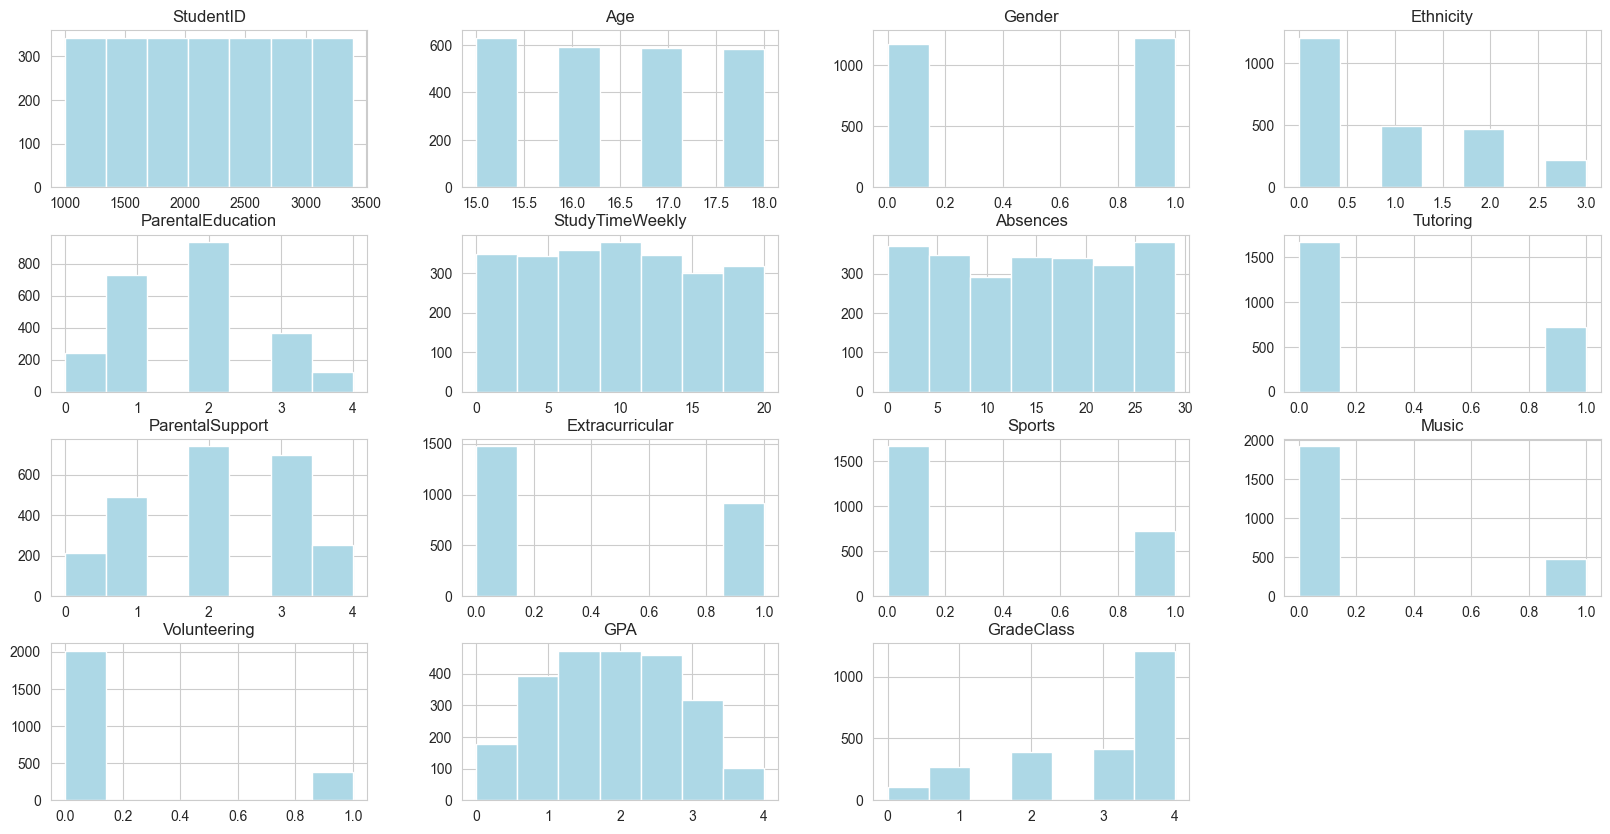

In [146]:
df.hist(figsize=(20,10),bins=7, color='lightblue')

### Check for Missing Values and Duplicates

In [147]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



Null values in each column:
 StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Number of duplicate rows: 0


### Descriptive Statistics

In [148]:
# Summary statistics for numerical columns
print(df.describe())




         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

### Categorical and Numerical Features

In [149]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")


Numerical columns: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']
Categorical columns: []


In order to proceed with assessing feature importance, there are two important steps:

1.Determine which columns are numeric and which are categoric. 

2.Encode the categoric columns to turn object variables into numbers.

3.Scale numerical columns to ensure that large numbers have an equal effect on our model as small numbers.


In [150]:
# Distinction is based on the number of different values in the column
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        
# Assuming the first column is an ID or non-numeric feature
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [151]:
# Convert numeric columns to float64
df[numeric_columns] = df[numeric_columns].astype('float64')

I create an empty list for categoric columns and numeric columns, and then createa for loop that cycles through our features and checks the number of unique values. If there are more than 5 unique values, we can assume that the feature is numerical. If there are less than 5, we can assume it's categorical.

This isn't true in all instances, and we can see one thing here that is a little wierd: Age is considered to be a categorical feature in this dataset.

The reason is that this dataset only contains high school students, so the age range is very small. If we were analyzing a dataset of students of all ages, then age would almost certainly be a numerical variable.

To ensure our numeric columns only contain numbers, I also convert the numeric columns to float64 type.



### Correlation Among Features

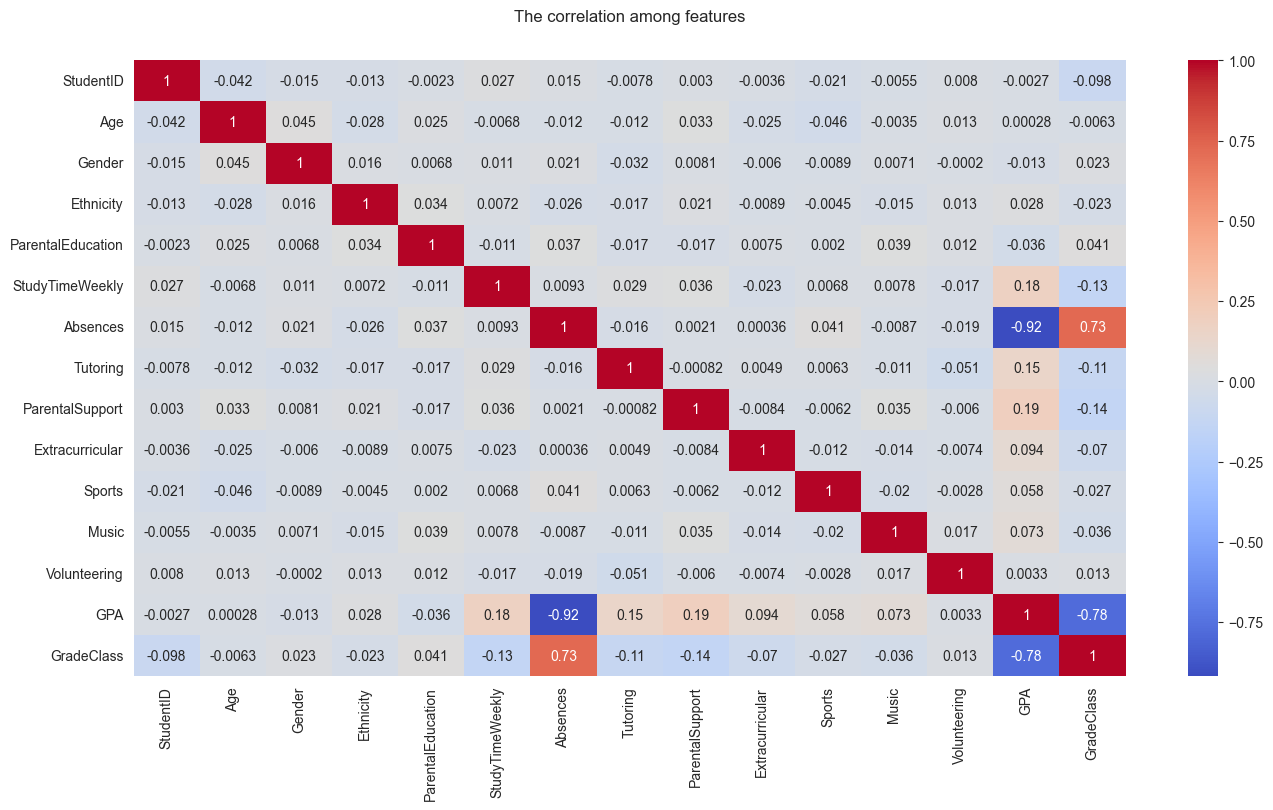

In [152]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

We can observe that the most correlated features to GradeClass are GPA and Absences. It is important to note that GPA cannot be treated as a predictor in this dataset. More information about this can be found below. When I split the DataFrame I will drop GPA.

## Visualize Data

#### 1.histogram

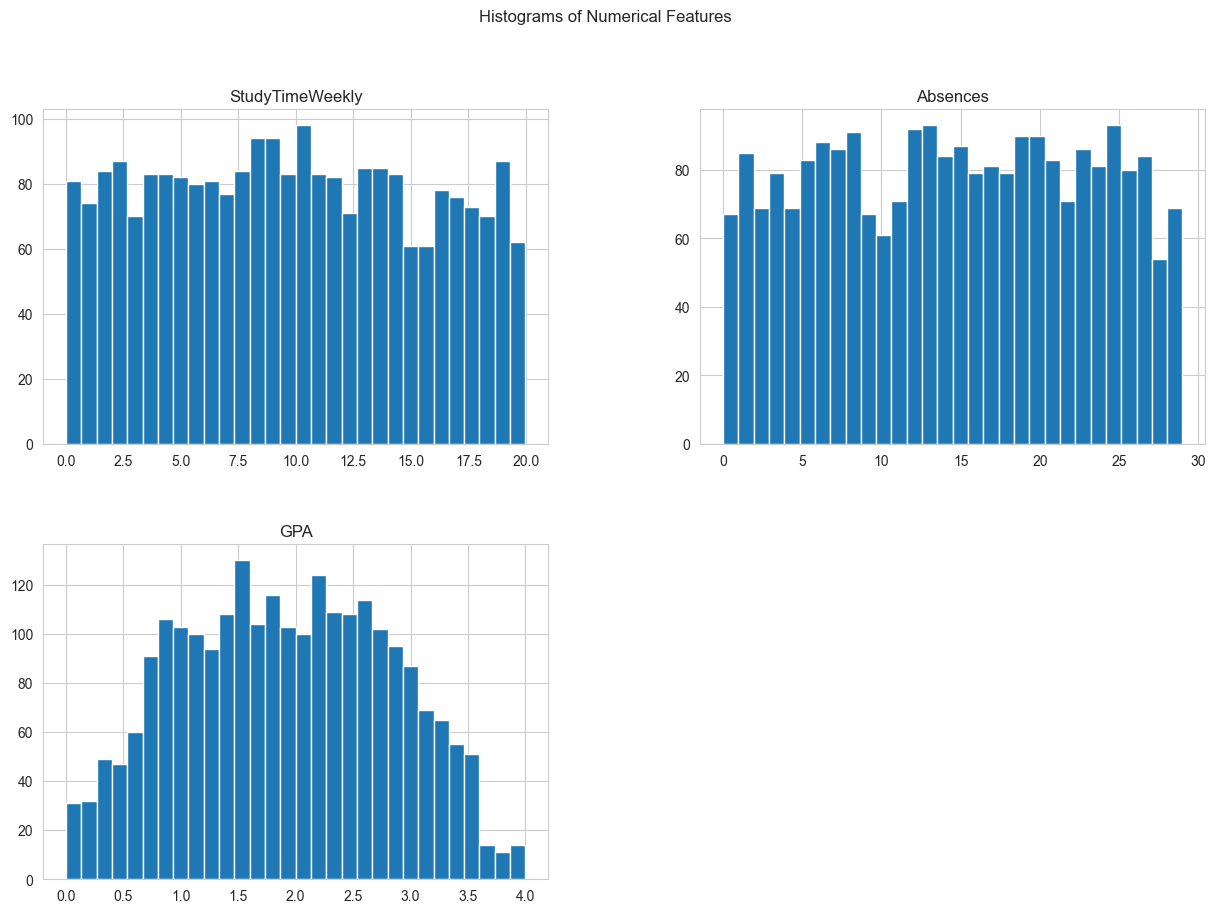

In [153]:
# Histograms for numerical features
df[numeric_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [154]:
## Histograms for categoric features

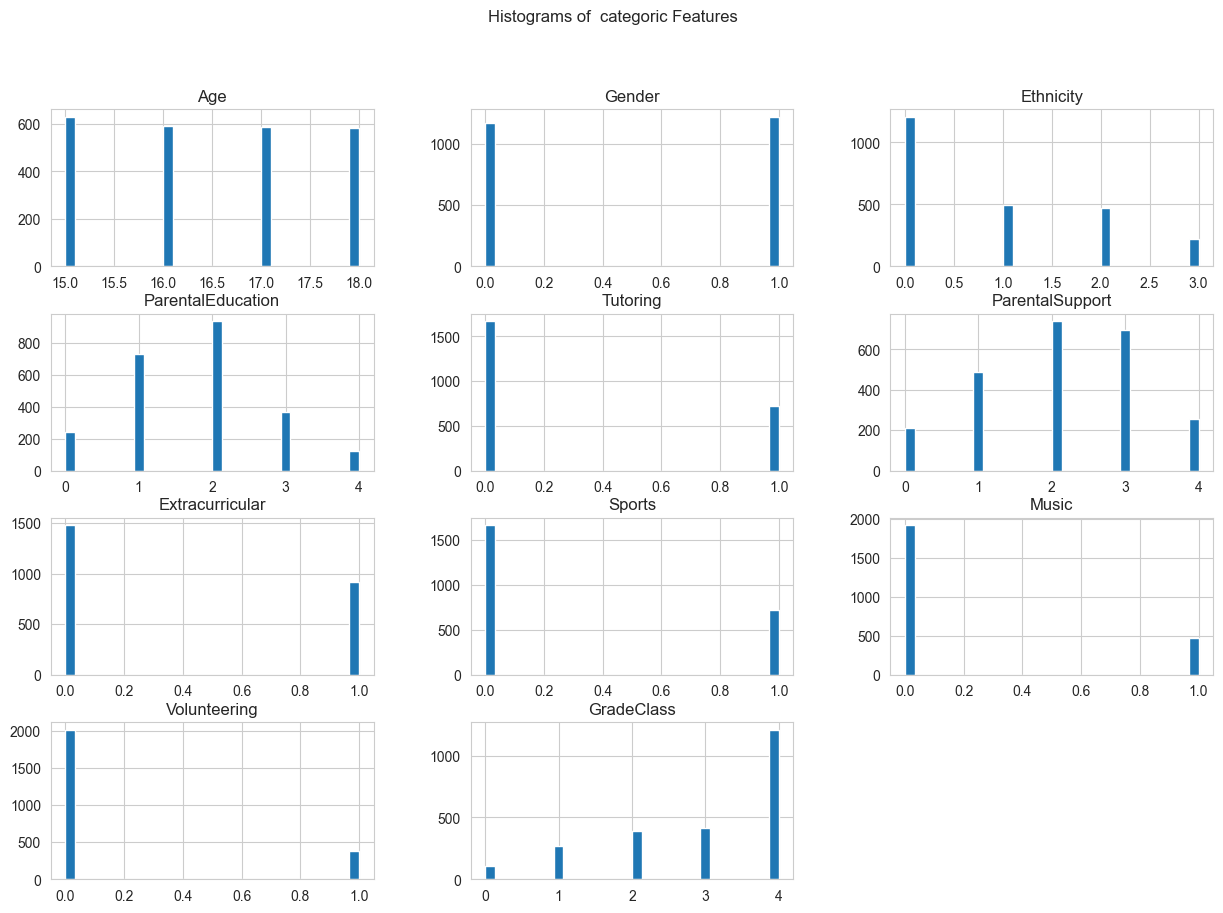

In [155]:
df[categoric_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of  categoric Features')
plt.show()

#### Scatter plot

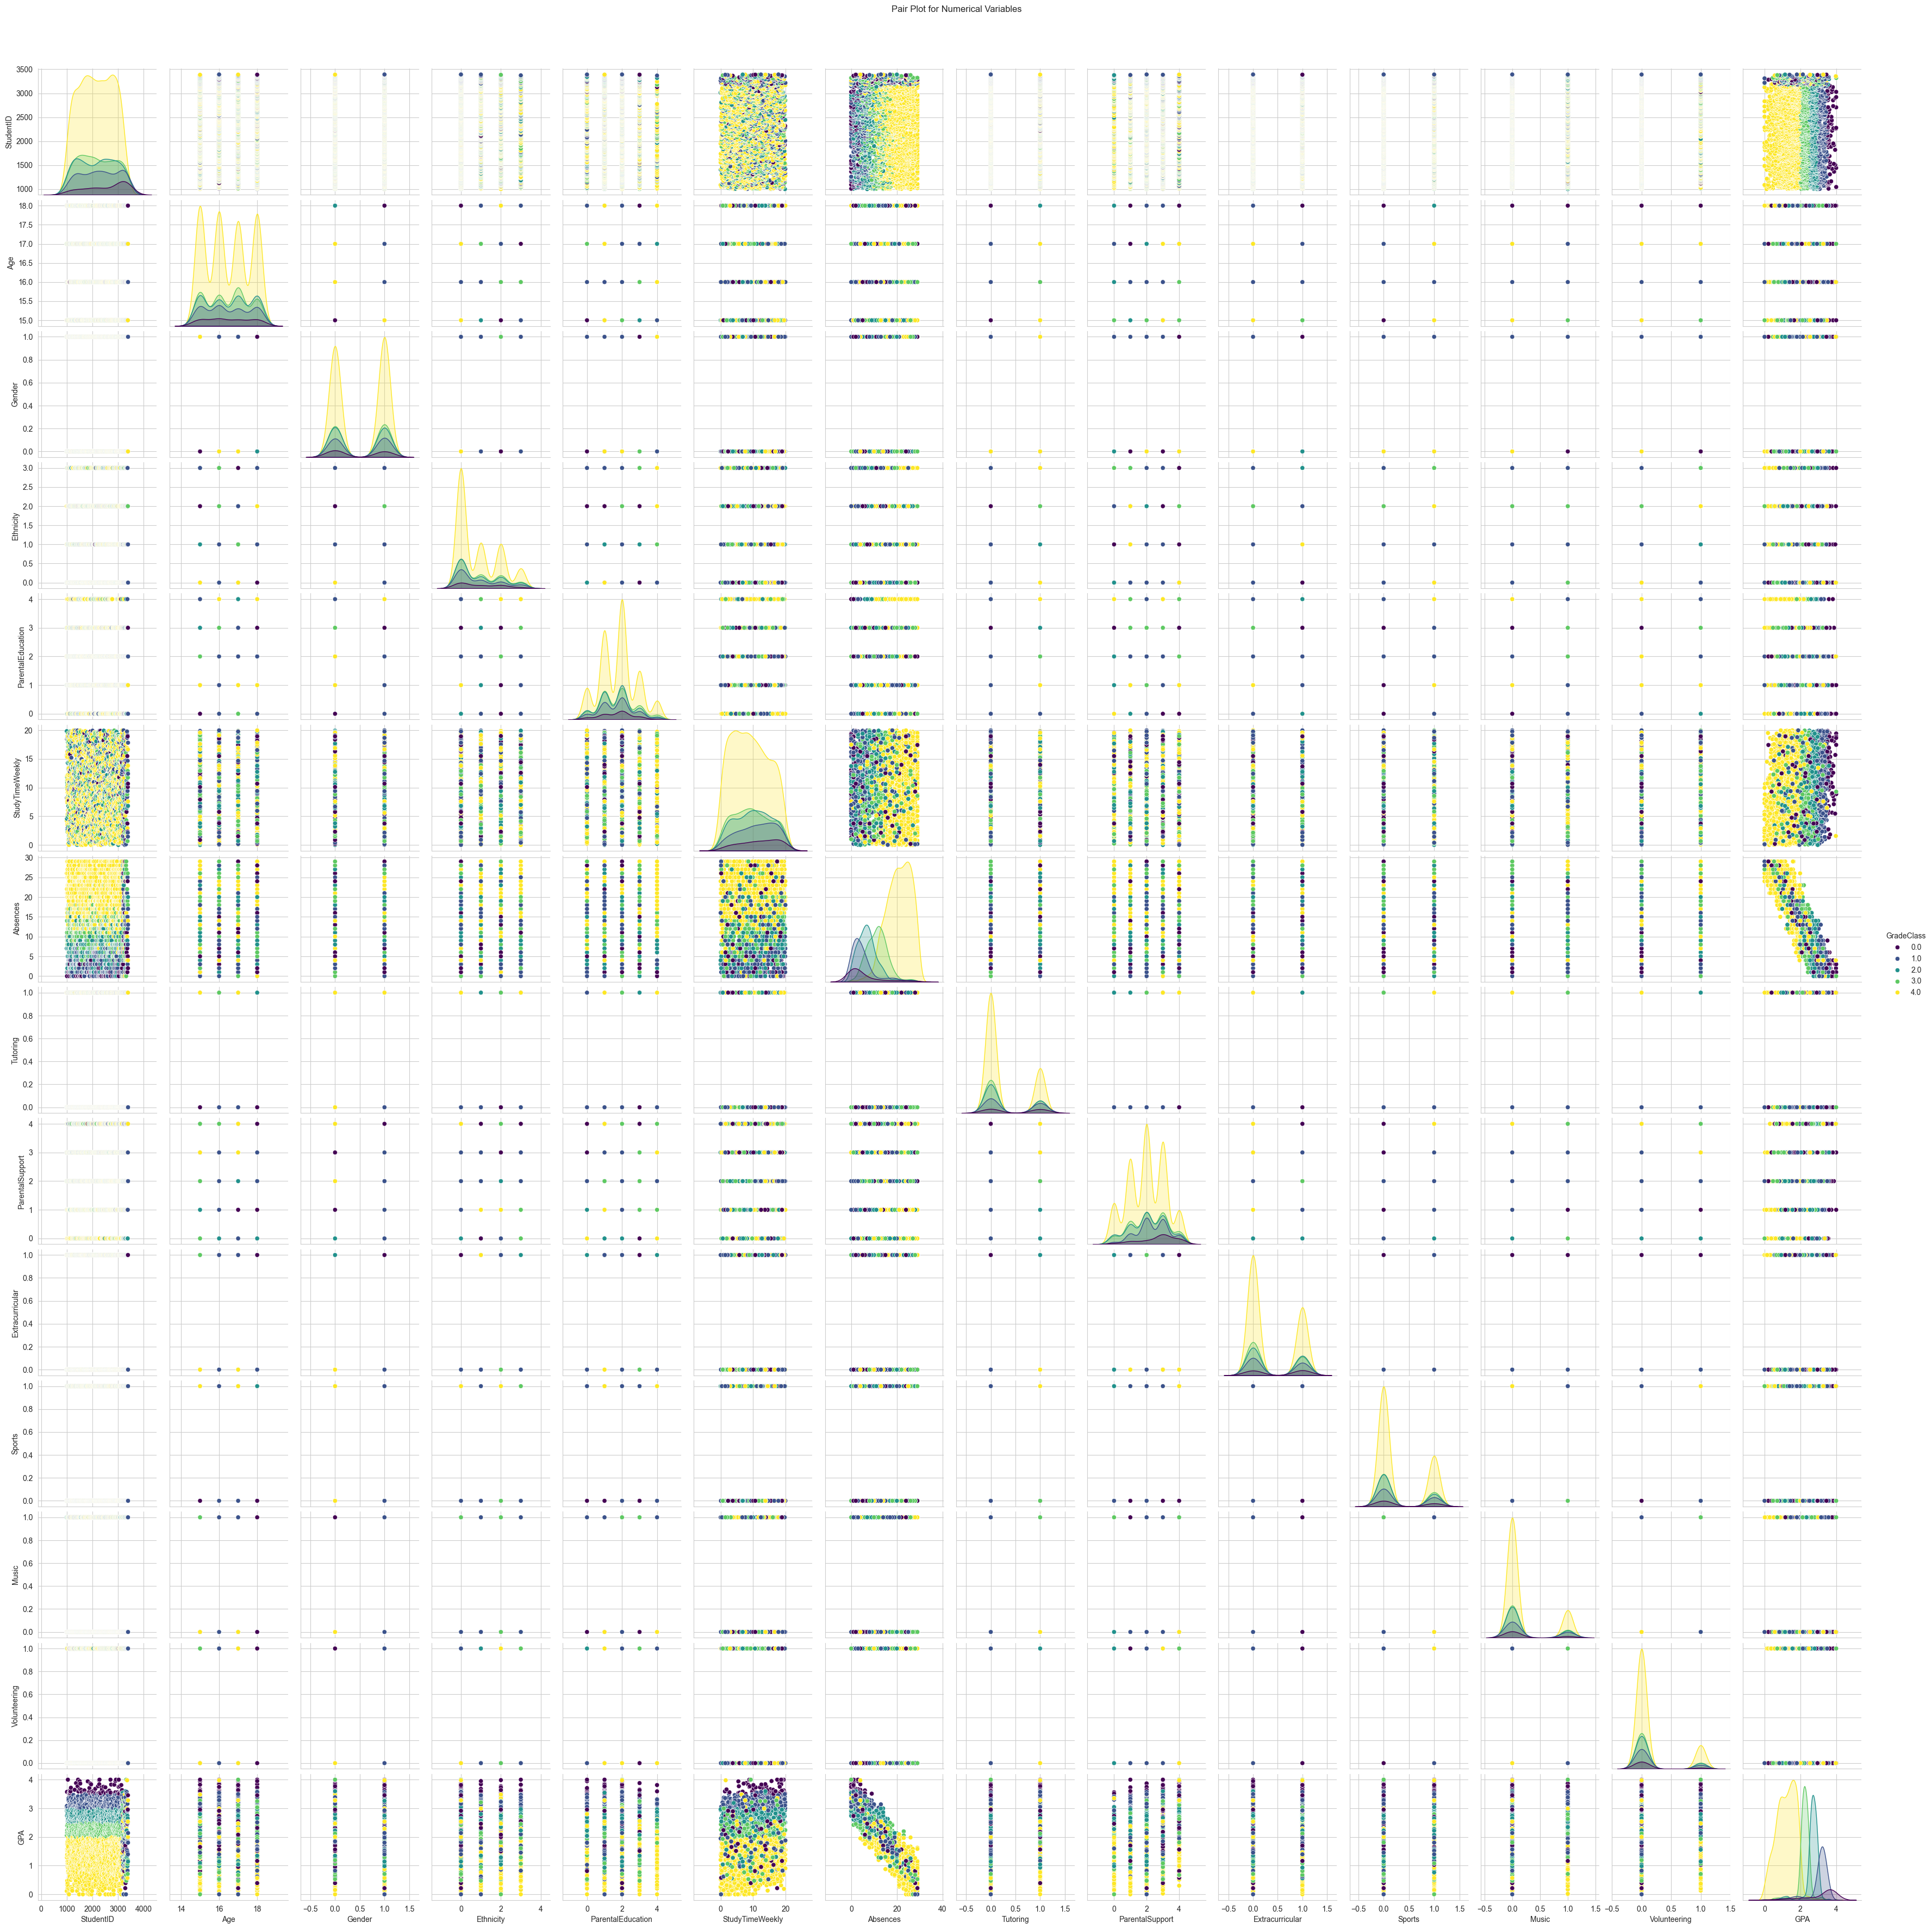

In [156]:
sns.pairplot(df, hue='GradeClass', palette='viridis')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot for Numerical Variables", y=1.02)
plt.show()

In [157]:
# Skewness and kurtosis
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

print("Skewness of numerical features:\n", skewness)
print("Kurtosis of numerical features:\n", kurtosis)

Skewness of numerical features:
 StudyTimeWeekly    0.050068
Absences          -0.026017
GPA                0.014526
dtype: float64
Kurtosis of numerical features:
 StudyTimeWeekly   -1.135682
Absences          -1.176225
GPA               -0.863277
dtype: float64


In [158]:
skewness = df[categoric_columns].skew()
kurtosis = df[categoric_columns].kurtosis()

print("Skewness of categoric features:\n", skewness)
print("Kurtosis of categoric features:\n", kurtosis)

Skewness of categoric features:
 Age                  0.035793
Gender              -0.043516
Ethnicity            0.759067
ParentalEducation    0.215650
Tutoring             0.866045
ParentalSupport     -0.166859
Extracurricular      0.480094
Sports               0.855253
Music                1.525339
Volunteering         1.884851
GradeClass          -0.900807
dtype: float64
Kurtosis of categoric features:
 Age                 -1.372099
Gender              -1.999779
Ethnicity           -0.767534
ParentalEducation   -0.286197
Tutoring            -1.251014
ParentalSupport     -0.722531
Extracurricular     -1.770992
Sports              -1.269605
Music                0.326931
Volunteering         1.553964
GradeClass          -0.416611
dtype: float64


## Outlier Detection

Outlier detection and treatment can be crucial for improving model performance. Here’s how you can detect and treat outliers in the dataset:

#### Using Zscore


In [159]:
import numpy as np
from scipy import stats

# Calculate z-scores for numerical features
z_scores = np.abs(stats.zscore(df[['StudyTimeWeekly', 'Absences', 'GPA']]))

# Threshold for defining outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)
print(f"Outliers detected at: {outliers}")


Outliers detected at: (array([], dtype=int64), array([], dtype=int64))


#### Using IQR(Interquartile Range)

In [160]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['StudyTimeWeekly', 'Absences', 'GPA']].quantile(0.25)
Q3 = df[['StudyTimeWeekly', 'Absences', 'GPA']].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[['StudyTimeWeekly', 'Absences', 'GPA']] < lower_bound) |
            (df[['StudyTimeWeekly', 'Absences', 'GPA']] > upper_bound)).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 0


According to the analysis, there are no outliers detected in the dataset using either the Z-Score method or the IQR method.
1.Z-Score Method: No outliers were found using a threshold of 3.
2.IQR Method: No outliers were found using the 1.5 * IQR criteria.

In [161]:
# Calculate skewness for numerical features
skewness = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']].skew()
print("Skewness of numerical features:")
print(skewness)


Skewness of numerical features:
Age                0.035793
StudyTimeWeekly    0.050068
Absences          -0.026017
GPA                0.014526
dtype: float64


In [162]:
col_name=df.select_dtypes("float64").columns
col_name

Index(['StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass'], dtype='object')

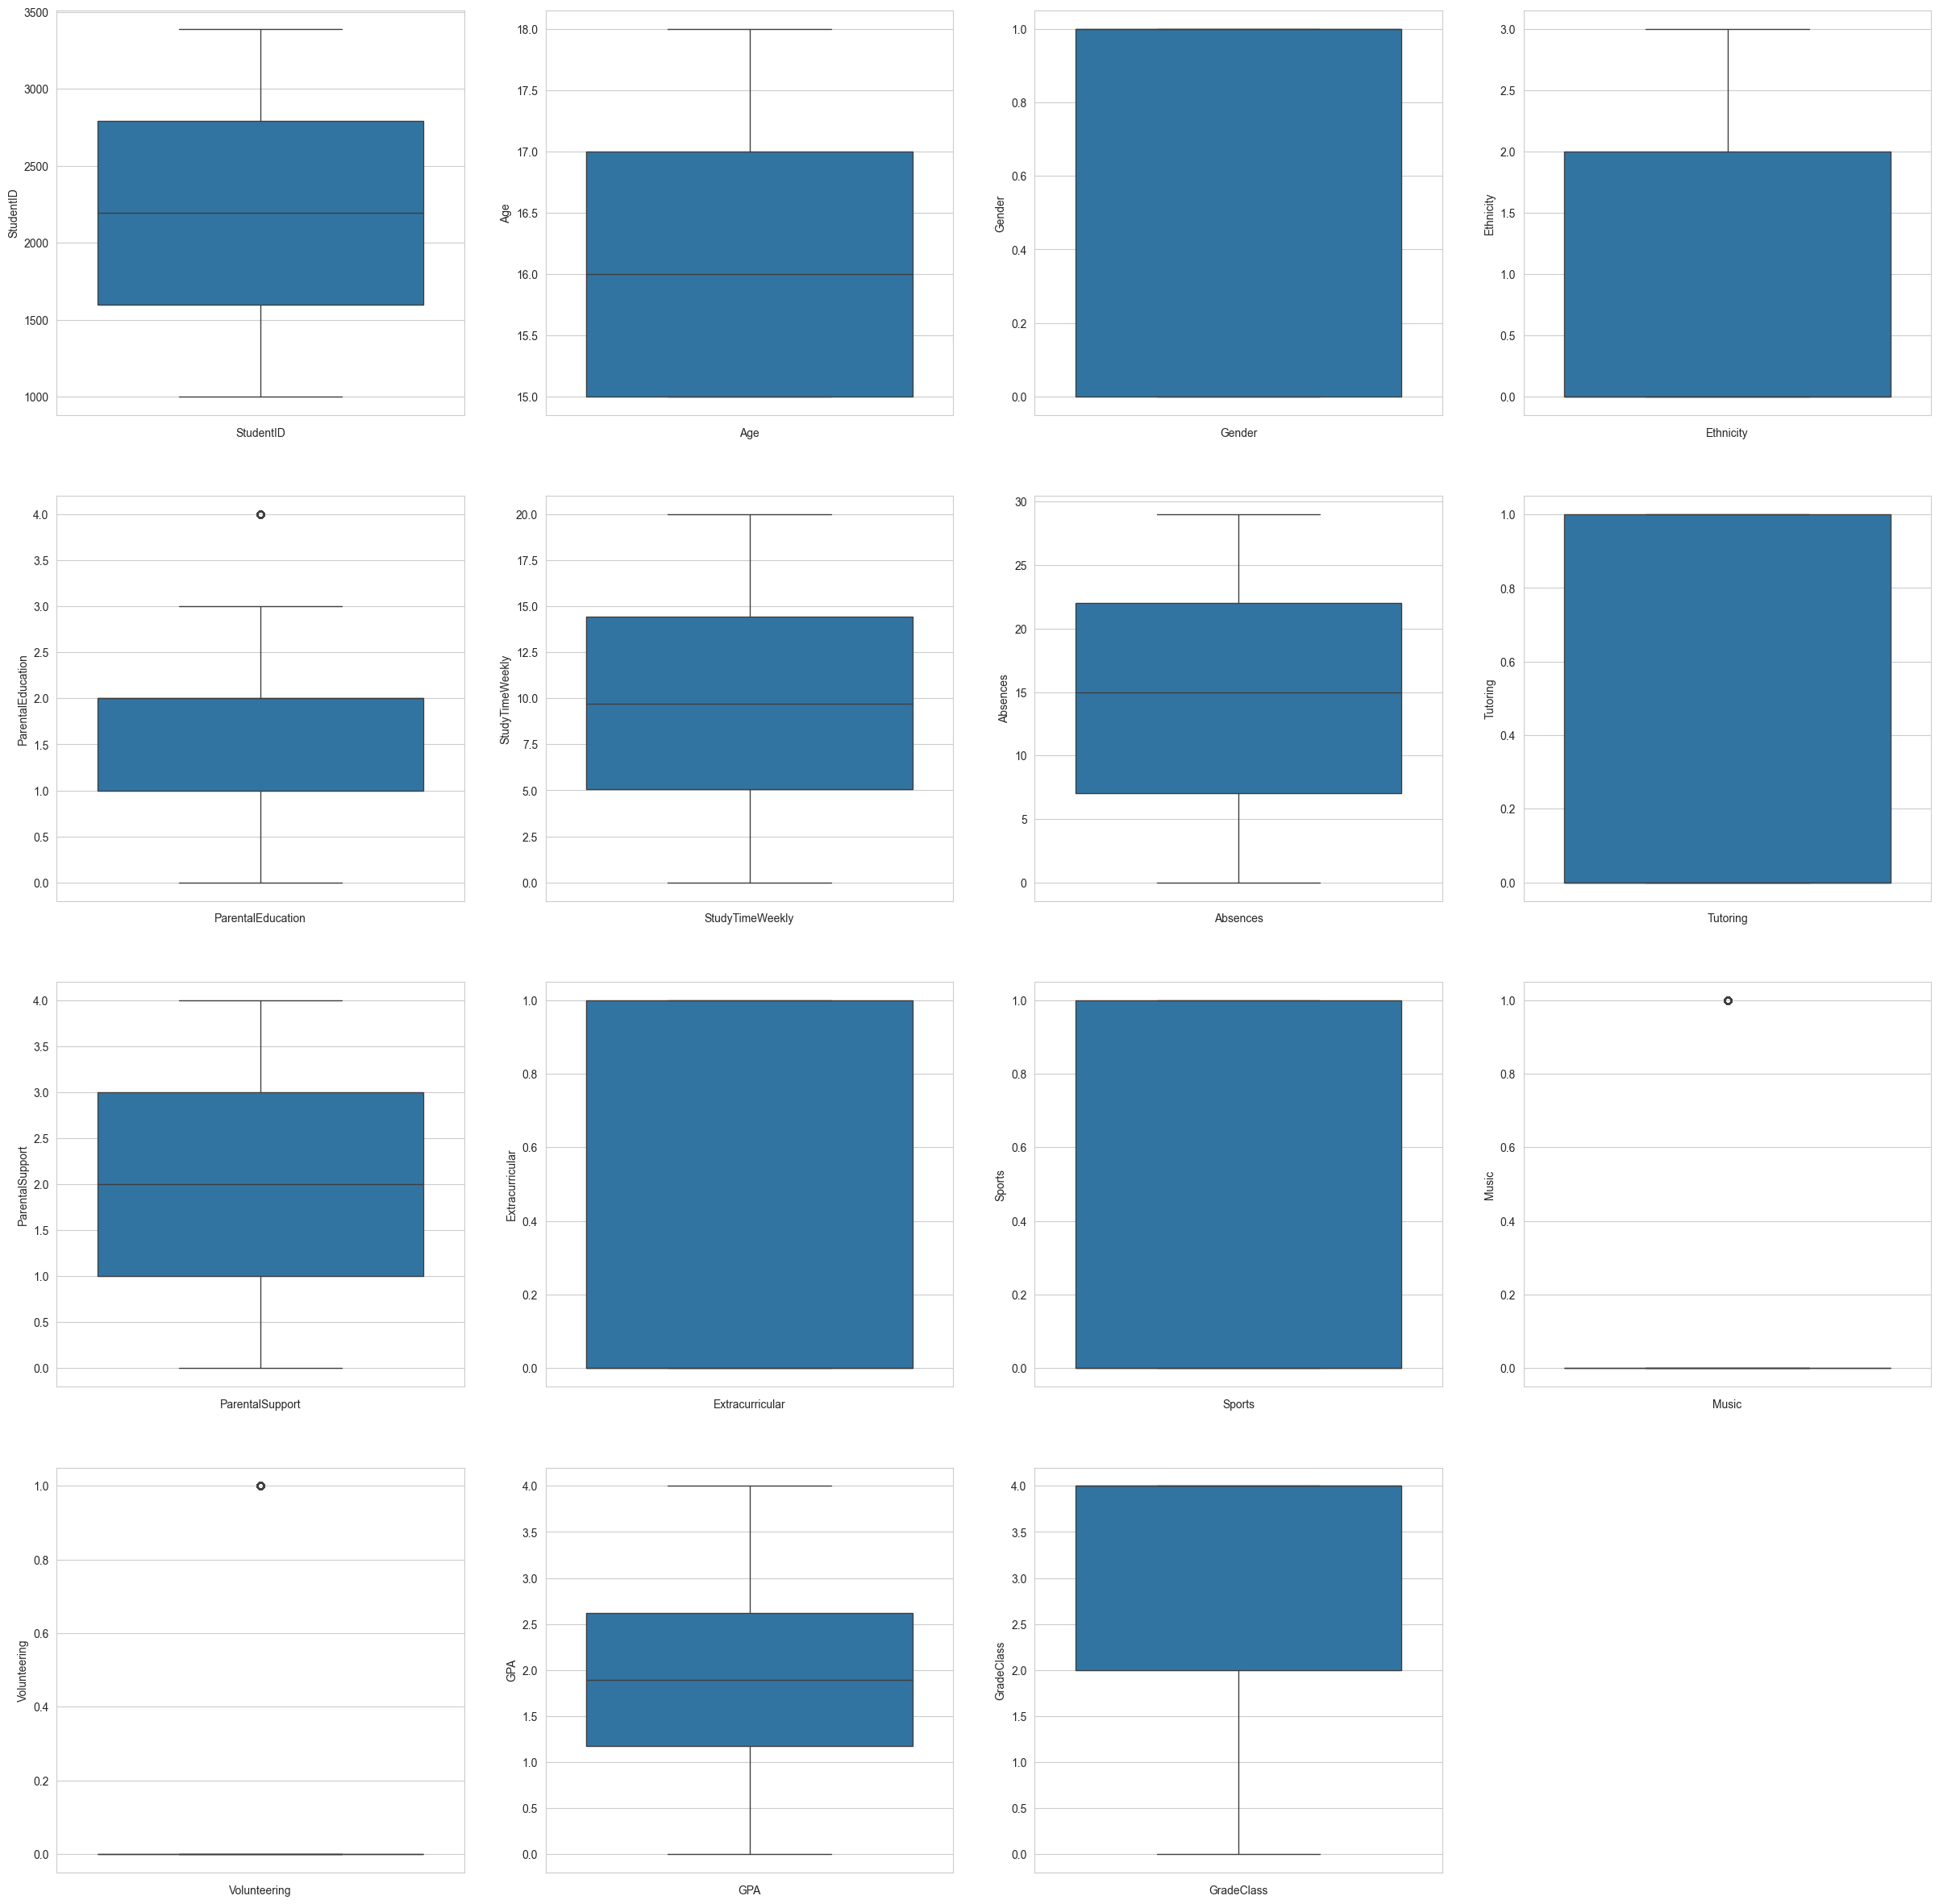

In [163]:
#box plot to identify outliers
fig=plt.figure(figsize=(30,30))
counter=0

for colmn in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[colmn])
    plt.xlabel(colmn)
    counter=counter+1


In [164]:
def whisker(colmn):
    q1,q3=np.percentile(colmn,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [165]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

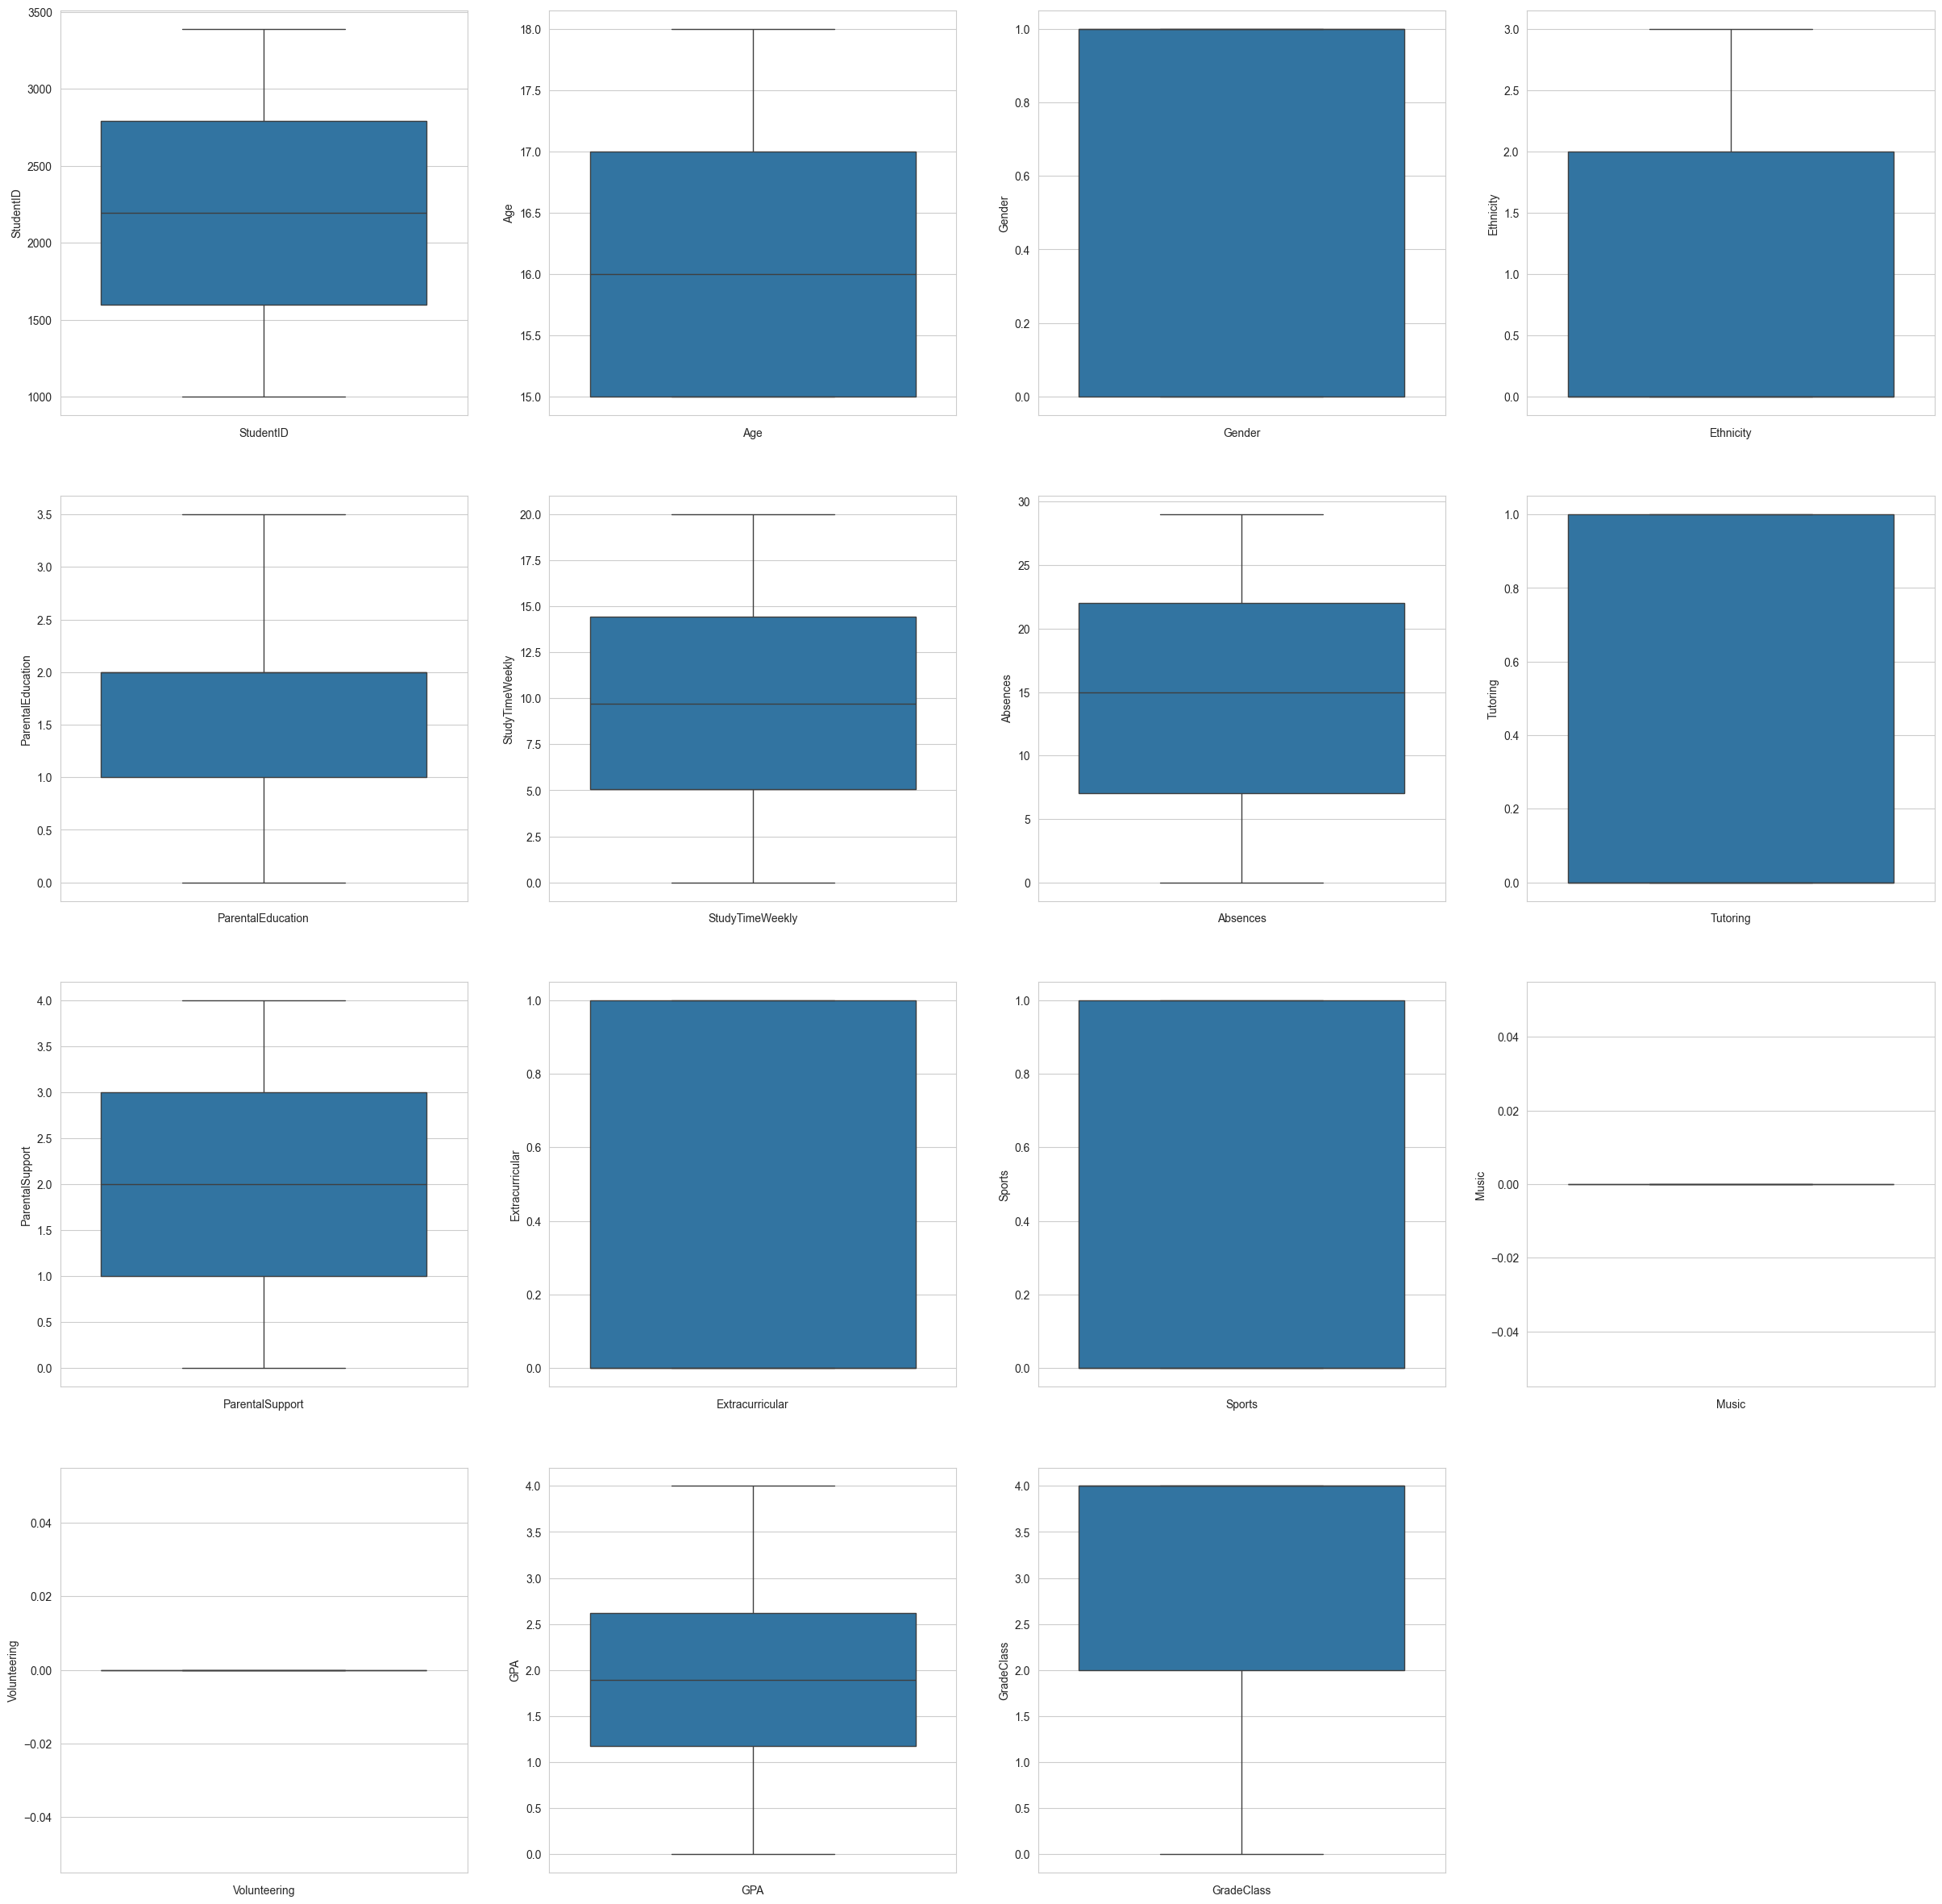

In [166]:
#box plot after outlier treatment
fig=plt.figure(figsize=(30,30))
counter=0

for colmn in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[colmn])
    plt.xlabel(colmn)
    counter=counter + 1

In [167]:
df

StudentID   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0        1001.0  17.0     1.0        0.0                2.0        19.833723   
1        1002.0  18.0     0.0        0.0                1.0        15.408756   
2        1003.0  15.0     0.0        2.0                3.0         4.210570   
3        1004.0  17.0     1.0        0.0                3.0        10.028829   
4        1005.0  17.0     1.0        0.0                2.0         4.672495   
...         ...   ...     ...        ...                ...              ...   
2387     3388.0  18.0     1.0        0.0                3.0        10.680555   
2388     3389.0  17.0     0.0        0.0                1.0         7.583217   
2389     3390.0  16.0     1.0        0.0                2.0         6.805500   
2390     3391.0  16.0     1.0        1.0                0.0        12.416653   
2391     3392.0  16.0     1.0        0.0                2.0        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0          7.0       1.0              2.0              0.0     0.0    0.0   
1          0.0       0.0              1.0              0.0     0.0    0.0   
2         26.0       0.0              2.0              0.0     0.0    0.0   
3         14.0       0.0              3.0              1.0     0.0    0.0   
4         17.0       1.0              3.0              0.0     0.0    0.0   
...        ...       ...              ...              ...     ...    ...   
2387       2.0       0.0              4.0              1.0     0.0    0.0   
2388       4.0       1.0              4.0              0.0     1.0    0.0   
2389      20.0       0.0              2.0              0.0     0.0    0.0   
2390      17.0       0.0              2.0              0.0     1.0    0.0   
2391      13.0       0.0              2.0              0.0     0.0    0.0   

      Volunteering       GPA  GradeClass  
0              0.0  2.929196         2.0  
1              0.0  3.042915         1.0  
2              0.0  0.112602         4.0  
3              0.0  2.054218         3.0  
4              0.0  1.288061         4.0  
...            ...       ...         ...  
2387           0.0  3.455509         0.0  
2388           0.0  3.279150         4.0  
2389           0.0  1.142333         2.0  
2390           0.0  1.803297         1.0  
2391           0.0  2.140014         1.0  

[2392 rows x 15 columns]

Since, we dont have categorical columns,we are avoiding "Encoding Process".

## Feature Scaling

There are different ways to encode features, for example One Hot Encoding. In this example I'm using LabelEncoder to encode the categoric features. I'm also using StandardScaler to scale our numeric columns to make them have equal weight on the model we use to evaluate feature importance and make predictions.There are different ways to encode features, for example One Hot Encoding. In this example I'm using LabelEncoder to encode the categoric features. I'm also using StandardScaler to scale our numeric columns to make them have equal weight on the model we use to evaluate feature importance and make predictions.

In [168]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:  
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


Feature scaling is an important preprocessing step in many machine learning workflows. It helps ensure that the different features contribute equally to the distance calculations and other metrics used by algorithms. Common methods for feature scaling include normalization and standardization.

In [169]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Identify numerical columns
numeric_columns = ['StudyTimeWeekly', 'Absences', 'GPA']  # Add other numerical columns as needed

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform Min-Max Scaling (Normalization)
df_normalized = df.copy()
df_normalized[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Perform Standard Scaling (Z-score)
df_standardized = df.copy()
df_standardized[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])
# Display the scaled data
print("Normalized Data:\n", df_normalized[numeric_columns].head())
print("\nStandardized Data:\n", df_standardized[numeric_columns].head())
df

Normalized Data:
    StudyTimeWeekly  Absences       GPA
0         0.992773  0.241379  0.732299
1         0.771270  0.000000  0.760729
2         0.210718  0.896552  0.028151
3         0.501965  0.482759  0.513555
4         0.233840  0.586207  0.322015

Standardized Data:
    StudyTimeWeekly  Absences       GPA
0         1.780336 -0.890822  1.118086
1         0.997376 -1.717694  1.242374
2        -0.984045  1.353542 -1.960277
3         0.045445 -0.063951  0.161790
4        -0.902311  0.290422 -0.675573


StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0        1001.0    2       1          0                  2         1.780336   
1        1002.0    3       0          0                  1         0.997376   
2        1003.0    0       0          2                  3        -0.984045   
3        1004.0    2       1          0                  3         0.045445   
4        1005.0    2       1          0                  2        -0.902311   
...         ...  ...     ...        ...                ...              ...   
2387     3388.0    3       1          0                  3         0.160762   
2388     3389.0    2       0          0                  1        -0.387285   
2389     3390.0    1       1          0                  2        -0.524895   
2390     3391.0    1       1          1                  0         0.467950   
2391     3392.0    1       1          0                  2         1.424008   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0    -0.890822         1                2                0       0      0   
1    -1.717694         0                1                0       0      0   
2     1.353542         0                2                0       0      0   
3    -0.063951         0                3                1       0      0   
4     0.290422         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387 -1.481445         0                4                1       0      0   
2388 -1.245196         1                4                0       1      0   
2389  0.644796         0                2                0       0      0   
2390  0.290422         0                2                0       1      0   
2391 -0.182076         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  1.118086           2  
1                0  1.242374           1  
2                0 -1.960277           4  
3                0  0.161790           3  
4                0 -0.675573           4  
...            ...       ...         ...  
2387             0  1.693315           0  
2388             0  1.500565           4  
2389             0 -0.834845           2  
2390             0 -0.112452           1  
2391             0  0.255559           1  

[2392 rows x 15 columns]

## Data Splitting


I'm going to split this dataset 2 ways before proceeding:
1.Split the data into our predictors (X) and our target feature (y)
2.Split the X and y dataframes into training and testing sets
I'm also dropping some features that I don't want to add noise to the model here:
- GradeClass : our target feature
- StudentID : studentID is not logically a useful predictor of a student's grade
- Age :I do not believe age should be used as a predictor for this data. The feature would not generalize well to future predictions on unseen data unless the age range is the same (15-18). I believe that removing age as a predictor creates a more robust model that we can apply to future student performance analysis.
- GPA : this would add unnecessary noise to the model and is not logical for future predictions

In [170]:

# CHOOSE THE TARGET FEATURE HERE, IN THIS CASE IT IS 'GradeClass'
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Feature Importance

I always find this step really cool, we can use a classification model to determine the importance of features in our dataset in terms of predicting our target variable. In this case, I'm using a RandomForestClassifier to assess the relative importance of features to predicting y.

In [171]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

Let's plot the results (a pandas series) in a barplot to make it obvious:

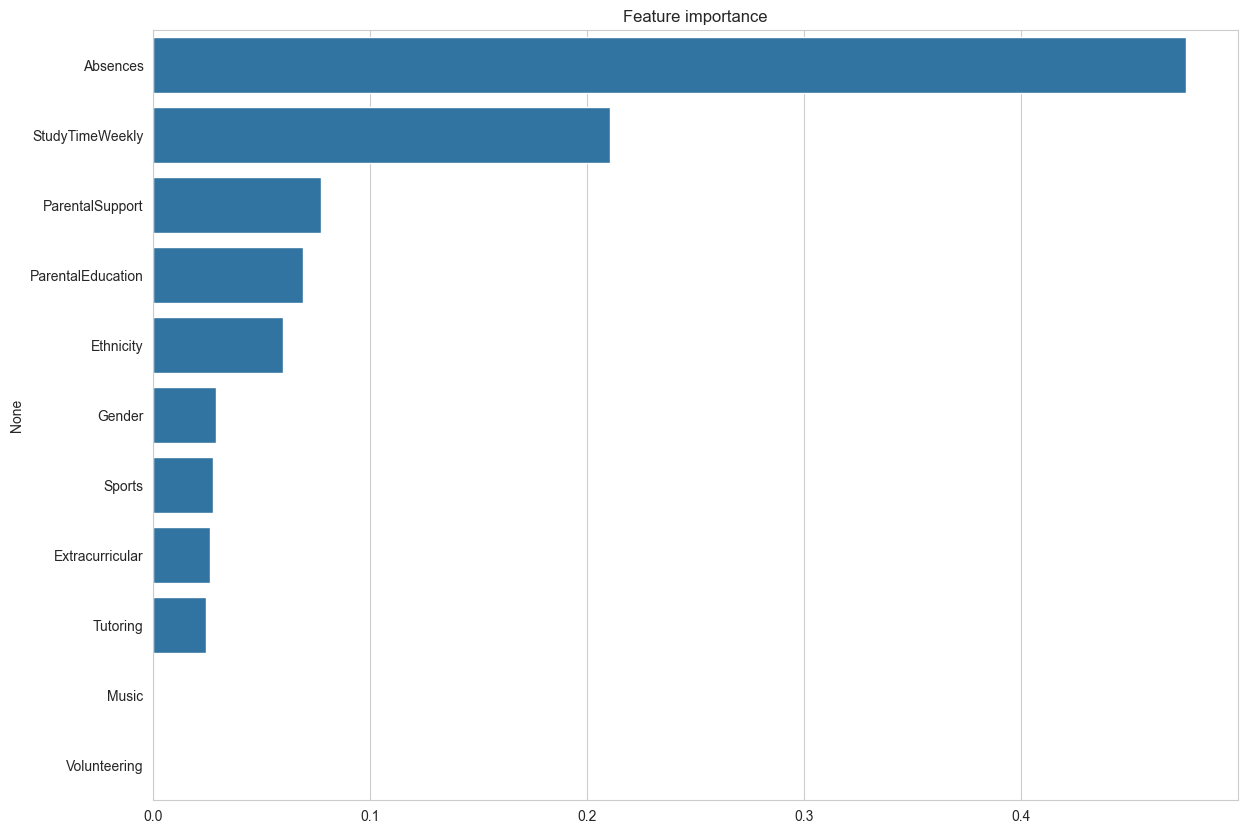

In [172]:
plt.figure(figsize=(14,10))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

The most important predictor of grade - by a long shot - is absences. This makes sense, but is also something I might consider removing later on. I am curious if the model will be equally (or more) accurate if we remove absence as a predictor. Of course, if a student is absent for many classes, they are likely to receive a lower grade. Does this actually reflect the student's academic abilities though?

For example, consider a student who is sick for a long period of time, or dealing with issues beyond their control at home. Yes, they will receive a lower grade, but their potential is certainly higher than the model would reflect. This is food for thought in regards to this particular dataset and question.

## Model Building

### Selecting a Classification Model

Here iam  cycling through all models with default settings and using the one with the best score as a starting block. It is not 100% accurate though. There is always a chance that after tuning a different model could yield better results. This is especially true in situations where multiple models receive similar scores.

In this case, I create a dictionary of classification models and 2 empty lists - model_names and accuracies. I use a for loop to loop through the dictionary and fit the models one-by-one to the training data. I then use the fitted model to make a prediction on the y_test data and score it using clf.score function. I append model names to the model_names list and scores to the accuracies list respectively. Finally, I create a dataframe with the model_names and accuracies and plot it using a barplot to easily visualize the most accurate models.

In [173]:
# Dictionary of classification models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []



Logistic Regression accuracy: 0.72
K-Nearest Neighbors accuracy: 0.64
Support Vector Machine accuracy: 0.73
Decision Tree accuracy: 0.59
Random Forest accuracy: 0.71
Gradient Boosting accuracy: 0.71


C:\Users\Siraj P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost accuracy: 0.64
Gaussian Naive Bayes accuracy: 0.68
XGBoost accuracy: 0.69
CatBoost accuracy: 0.71


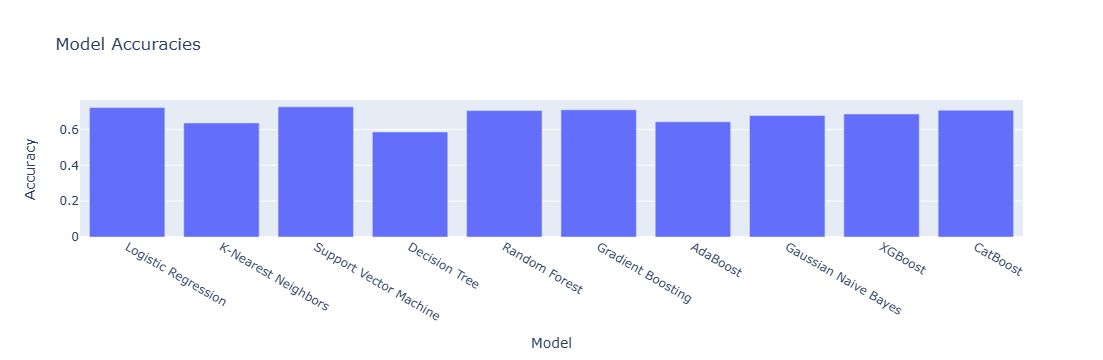

In [174]:
# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies') 
fig.show()

We can see that there are multiple models that would be effective for this task:
 - Logistic Regression
 - Support Vector Machine
 - Random Forest
 - Gradient Boosting
 - XGBoost
 - Catboost

In [175]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Support Vector Machine with an accuracy of 0.73


I can easily select the best model from our dictionary by sorting by accuracy. In this case, the model I will start with is a Support Vector Machine.

## Evaluating the Model

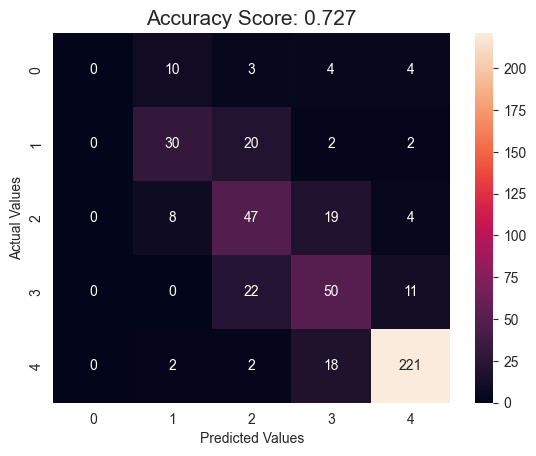

In [176]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

I fit the best model to the training data, and use the fitted model to make predictions for y_test. We then write these scores into a Confusion Matrix to quickly evaluate how the model performed. We can see that the model is approximately 72.7% accurate in it's predictions. There are a lot of misclassified predictions. 72.7% is pretty good, but not perfect.

We can also compare the results for predicting the test data to the predictions on training data to check for over/underfitting.

## Tuning the Model

### Hyperparameter Tuning¶

Hyperparameter tuning can be quite complicated. A simple approach is to use a grid or randomized search to determine the best hyperparameters. A grid search is generally more powerful, at the cost of increased resources. A randomized search might not be 100% optimal, but it is generally faster.

In this case I've selected a RandomizedSearch due to the amount of resources on my PC. In order to implement a RandomizedSearch I define the evaluation metrics (RepeatedStratifiedKFold with 10 splits) and the model (Support Vector Machine) and then create a grid of potential hyperparameters before using Randomized Search to make a guess at the optimal configurations from random combinations from the grid.

In [177]:
# Define the model
model = SVC()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid
grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }

# Define search
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit search to training data
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7485593004653868
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


#### Model Evaluation (again)

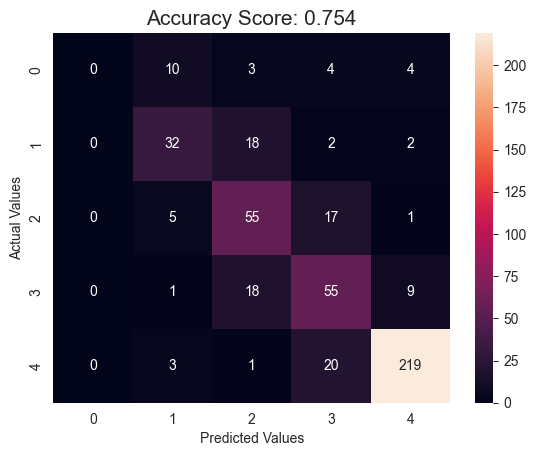

In [178]:
# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

Hyperparameter tuning led to a substantial improvement, boosting the accuracy to 75.4%. This indicates that the model was able to learn better with the optimized parameters, capturing the underlying patterns in the data more effectively.

### Reducing Dimensionality

Dimensionality reduction is the process of reducing the number of random variables under consideration, typically by obtaining a set of principal variables. It is a crucial step in data preprocessing, especially when dealing with high-dimensional data, to simplify models, reduce overfitting, and improve performance.

We know from our earlier investigation that the most important features are:

In [179]:
fimp.head(3)

Absences           0.476031
StudyTimeWeekly    0.210676
ParentalSupport    0.077439
dtype: float64

What happens to our predictions if we only use these as predictors?

In [180]:
X_train = X_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]
X_test = X_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]

In [181]:
# Define Model
model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
result = model.fit(X_train, y_train)

# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)



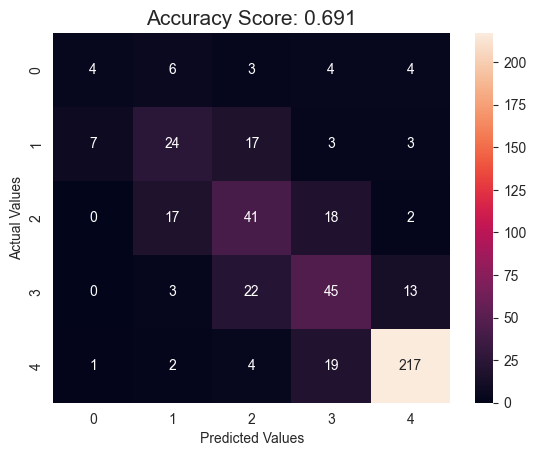

In [182]:
# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()


This is actually quite interesting. The accuracy of our model drops slightly, but the dimensionality is massively reduced. It turns out that we can predict the academic success of students with almost 70% accuracy using just 3 features.

## Result

A Support Vector Machine predicts the grade of students using the features provided with 72.7% accuracy on the test set without hyperparameter tuning.

The same model is 69.7% accurate if we reduce the dimensionality of the DataFrame to just 3 features:

- Absences
- StudyTimeWeekly
- ParentalSupport

If we want our model to be slightly more accurate at the cost of more resources we can include all of the features.

There's a really interesting takeaway from this. If you want to achieve good grades in highschool:
Go to class and Study the material you learn in class

Parental support or the involvement of parents in your academic endeavours is an important predictor in the success of the student. Unfortunately for students this feature is beyond their control.

So we can predict that Academic Success Factors in High School Students will be  70%  while considering only 3 features

## Model Deployment

Model deployment involves making your trained machine learning model available for use in a production environment. This typically involves saving the model, creating an API to serve the model, and setting up a system for handling requests and responses.

Steps for Model Deployment:
1.Train and Save the Model: Train your model and save it to disk. 

2.Create a Flask App: Set up a Flask application to serve the model.
    
3.Create API Endpoints: Define endpoints for prediction.
                                        
4.Run the Flask App: Start the Flask application to listen for incoming requests.

In [183]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Identify numerical columns
numeric_columns = [ 'StudyTimeWeekly', 'Absences', 'GPA']

# Identify target variable and features
target = 'GradeClass'
features = df.columns.drop(['StudentID', target])

# Handle missing values (if any)
df = df.dropna()

# Split the data into training and testing sets
X = df[features]
y = df[target]

# Perform standard scaling on numerical features
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



C:\Users\Siraj P\AppData\Local\Temp\ipykernel_5264\2440022974.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RandomForestClassifier(random_state=42)

In [184]:
# Save the trained model and the scaler
joblib.dump(model, 'random_forest_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

2. Create a Flask App

In [185]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [186]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model and the scaler
model = joblib.load('random_forest_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the API endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.get_json(force=True)
    
    # Convert JSON data to a DataFrame
    df = pd.DataFrame([data])
    
    # List of numerical columns
    numeric_columns = ['StudyTimeWeekly', 'Absences', 'GPA']
    
    # Scale the numerical features
    df[numeric_columns] = scaler.transform(df[numeric_columns])
    
    # Make predictions
    prediction = model.predict(df)
    
    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Siraj P\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



The warning you're seeing indicates that Flask's built-in server is not intended for use in a production environment. The development server is designed for local development and debugging but is not robust or secure enough for production deployment. 
For production,We should use a production-ready WSGI server like Gunicorn or uWSGI.

The specific warning and traceback details you provided also suggest there was an attempt to exit the program, which caused a SystemExit exception. This can occur if there was an issue starting the Flask application or if you manually tried to exit the interactive shell.


## Limitation

The limitations of this dataset analysis can stem from various factors including data quality, dataset characteristics, and the scope of the analysis. Here are some potential limitations to consider:

1. Data Quality Issues:

 - Missing Values: If the dataset has missing values, the way they are handled (e.g., imputation or removal) could affect the analysis results.
 - Inaccurate or Inconsistent Data: Errors or inconsistencies in data entry can lead to misleading conclusions.

2. Sample Size and Representativeness:

 - Non-Representative Sample: If the dataset is not representative of the general population (e.g., only high school students), the findings may not be generalizable.
 - If the dataset is small, it might not capture the full variability of the population, leading to less reliable results.

3. Feature Limitations:

 - Limited Features: The dataset might lack important features that could provide more insights or improve the predictive models.
 - Imbalanced Features: Features that are imbalanced (e.g., one category dominates in categorical features) can skew the analysis and model performance.

4.Categorical Features Handling: 

 - Incorrect Classification: Misclassifying features (e.g., treating 'Age' as categorical) can lead to inappropriate preprocessing steps.
 - Rare Categories: Handling rare categories in categorical features can be challenging and may require domain-specific knowledge.

5.Ethical Considerations:

 - Bias in Data: The dataset might contain biases that could be perpetuated or amplified by the analysis and models, leading to unfair or discriminatory outcomes.

6.Datatype:

 - All the data in the dataset where in numerical.Therefore to create a categorical features we really have to do some python programs to distinguish between numerical and categorical features based on the number of unique values.
This method might sometimes misclassify features.

## Conclusion

The analysis provided valuable insights into the factors influencing student performance. By understanding these relationships, educators and policymakers can develop targeted interventions to improve student outcomes. However, it's important to consider the dataset's limitations and complement this analysis with additional data and more sophisticated models for a more comprehensive understanding.
This analysis lays a foundation for further research and can be expanded by incorporating more diverse datasets, exploring advanced modeling techniques, and considering additional contextual factors.

1.Key Findings: 

- The dataset provides a comprehensive view of factors influencing students' academic performance.
- Initial data exploration revealed no missing values and minimal skewness in numerical features.
- The dataset had few outliers, and their presence did not significantly impact the model's performance.
- Data visualization helped in understanding the distribution and relationships between variables.
- Model building and evaluation showed a substantial improvement in accuracy after hyperparameter tuning.

2.Model Performance:  

Initial Model Accuracy (72.7%):
- This was the baseline performance of the model using default parameters without any optimization.

Hyperparameter Tuning Accuracy (75.4%):

- By optimizing the model's hyperparameters, we improved the model's performance. Hyperparameter tuning helps in finding the best set of parameters that maximize the model's performance on the validation set.

Dimensionality Reduction (69.7%):

- Reduces the number of features, which can help improve model performance, reduce overfitting, and make models more interpretable.
- Even if you achieved a good accuracy score with hyperparameter tuning, dimensionality reduction can still be beneficial to further refine the model, reduce computational costs, and enhance interpretability.
- Also,Drop in accuracy suggests that while dimensionality reduction simplifies the model, it may remove important features.Indicates that not all features are redundant; some contain crucial information necessary for accurate prediction.

So we conclude that a Support Vector Machine predicts the grade of students using the features provided with 72.7% accuracy on the test set without hyperparameter tuning and t
The same model is 69.7% accurate if we reduce the dimensionality of the DataFrame to just 3 features: 1.Absences 2.StudyTimeWeekly 3.ParentalSuppo.

Therefore,we can predict the academic success of students in high school will be almost 70%  using just 3 features.
rt




## Future Work

- Feature Engineering: Explore additional features or transformations that could further improve model performance.
- Ensemble Methods: Experiment with ensemble learning techniques like Random Forest, Gradient Boosting, or voting classifiers to potentially improve     accuracy.
- Cross-Validation: Use cross-validation techniques to ensure the model's robustness and generalizability.
- Interpretability: Implement methods to interpret the model's predictions, such as SHAP values or feature importance plots, to understand the impact of different features on predictions.
- Deployment: Deploy the model in a real-world scenario, possibly using Flask or another web framework, to provide predictions in an application setting.
- Collect more data:Collect more data from diverse sources to increase the dataset size, which can help improve model generalizability and robustness.
Include data from different schools, regions, and student demographics to ensure a more comprehensive understanding of factors influencing academic success.
- Explore Different Algorithms:Explore deep learning models for capturing complex patterns in the data.
  
By Following these you can ensure a thorough and insightful analysis of the dataset, leading to better understanding and improved predictive models.